In [17]:
import pickle
import matplotlib.pyplot as plt
ct_idx = 3
volume_dim = 6

root_dir = 'db'
with open(f'{root_dir}/sample_{ct_idx}/two_p_data_{volume_dim}.pickle', 'rb') as file:
    # Deserialize the data from the file and assign it to a variable
    twp_p_results = pickle.load(file)

In [18]:
len(twp_p_results[0]['compare'])

30

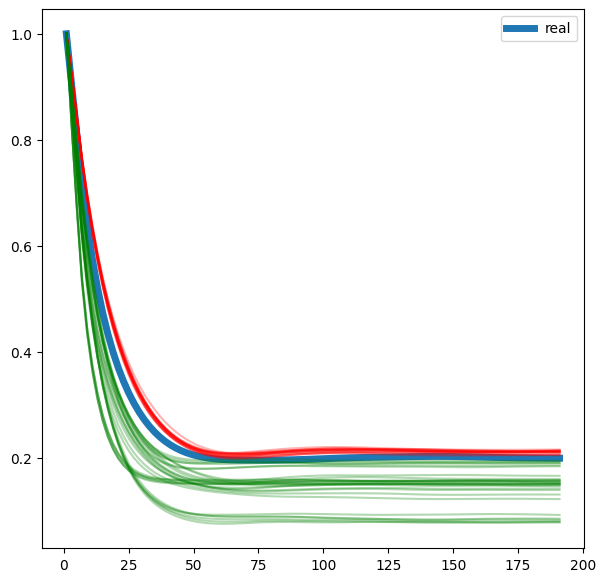

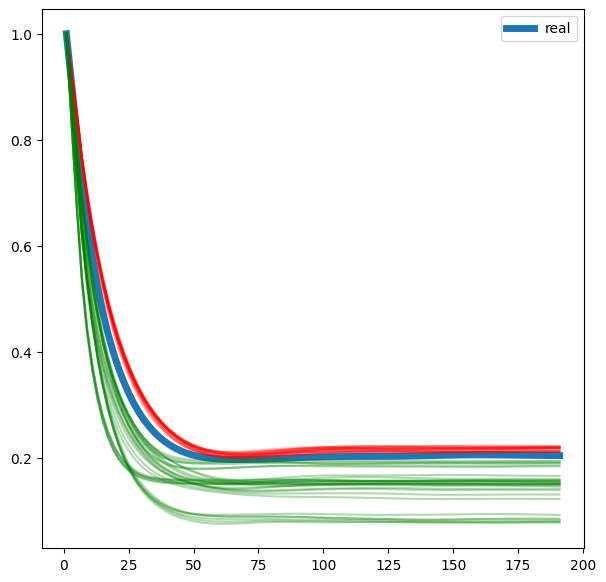

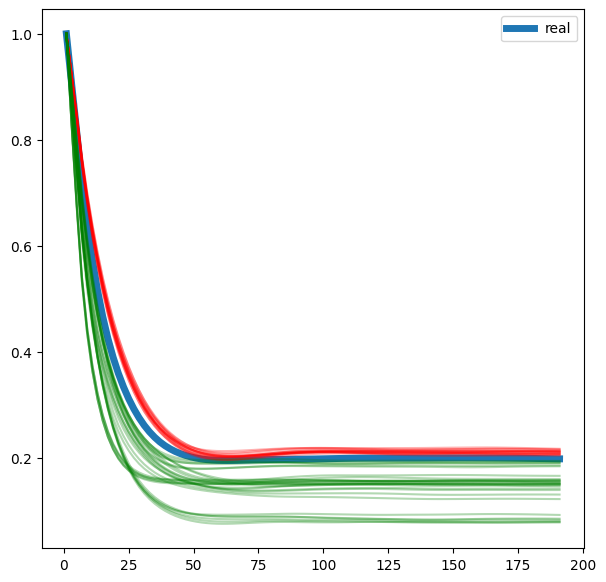

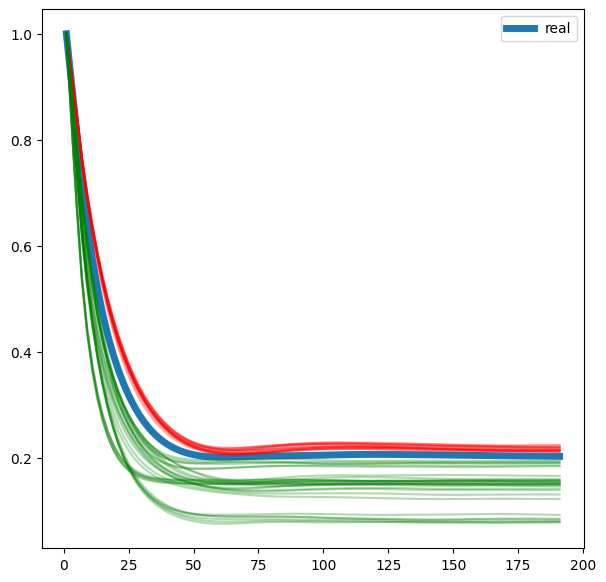

In [19]:
for sample_idx in range(4):
    two_p = twp_p_results[sample_idx]
    num_pred = len(two_p['pred'])
    num_compare = len(two_p['compare'])

    pred = two_p['pred']
    compare = two_p['compare']
    real = two_p['real']

    f = plt.figure(figsize=(7,7))

    plt.plot(real.distance,real.probability,label='real',linewidth=5)
    for i in range(num_pred):
        plt.plot(pred[i].distance,pred[i].probability,c='r',alpha=0.3)
    for i in range(num_compare):
        plt.plot(compare[i].distance,compare[i].probability,c='g',alpha=0.3)

    plt.legend()